Importing Data and Required Packages

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [173]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
 
from sklearn.neighbors import KNeighborsClassifier
 
from sklearn.linear_model import LogisticRegression

import warnings

In [176]:
strk_data= pd.read_csv('dataset//healthcare-dataset-stroke-data.csv')
strk_data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [177]:
strk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [178]:
strk_data.shape

(5110, 12)

In [179]:
strk_data.head(20)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [180]:
strk_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [181]:
strk_data.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [182]:
duplicate = strk_data[strk_data.duplicated()]
print("These are duplicated rows " , duplicate )

These are duplicated rows  Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


In [183]:
strk_data.drop_duplicates(inplace=True)

In [184]:
strk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 519.0+ KB


In [185]:
strk_data['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [186]:
strk_data['age']=strk_data['age'].astype(int)
strk_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   int32  
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 499.0+ KB


Checking for outliers

In [187]:
outliers_strk_data = strk_data.copy()
outliers_strk_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


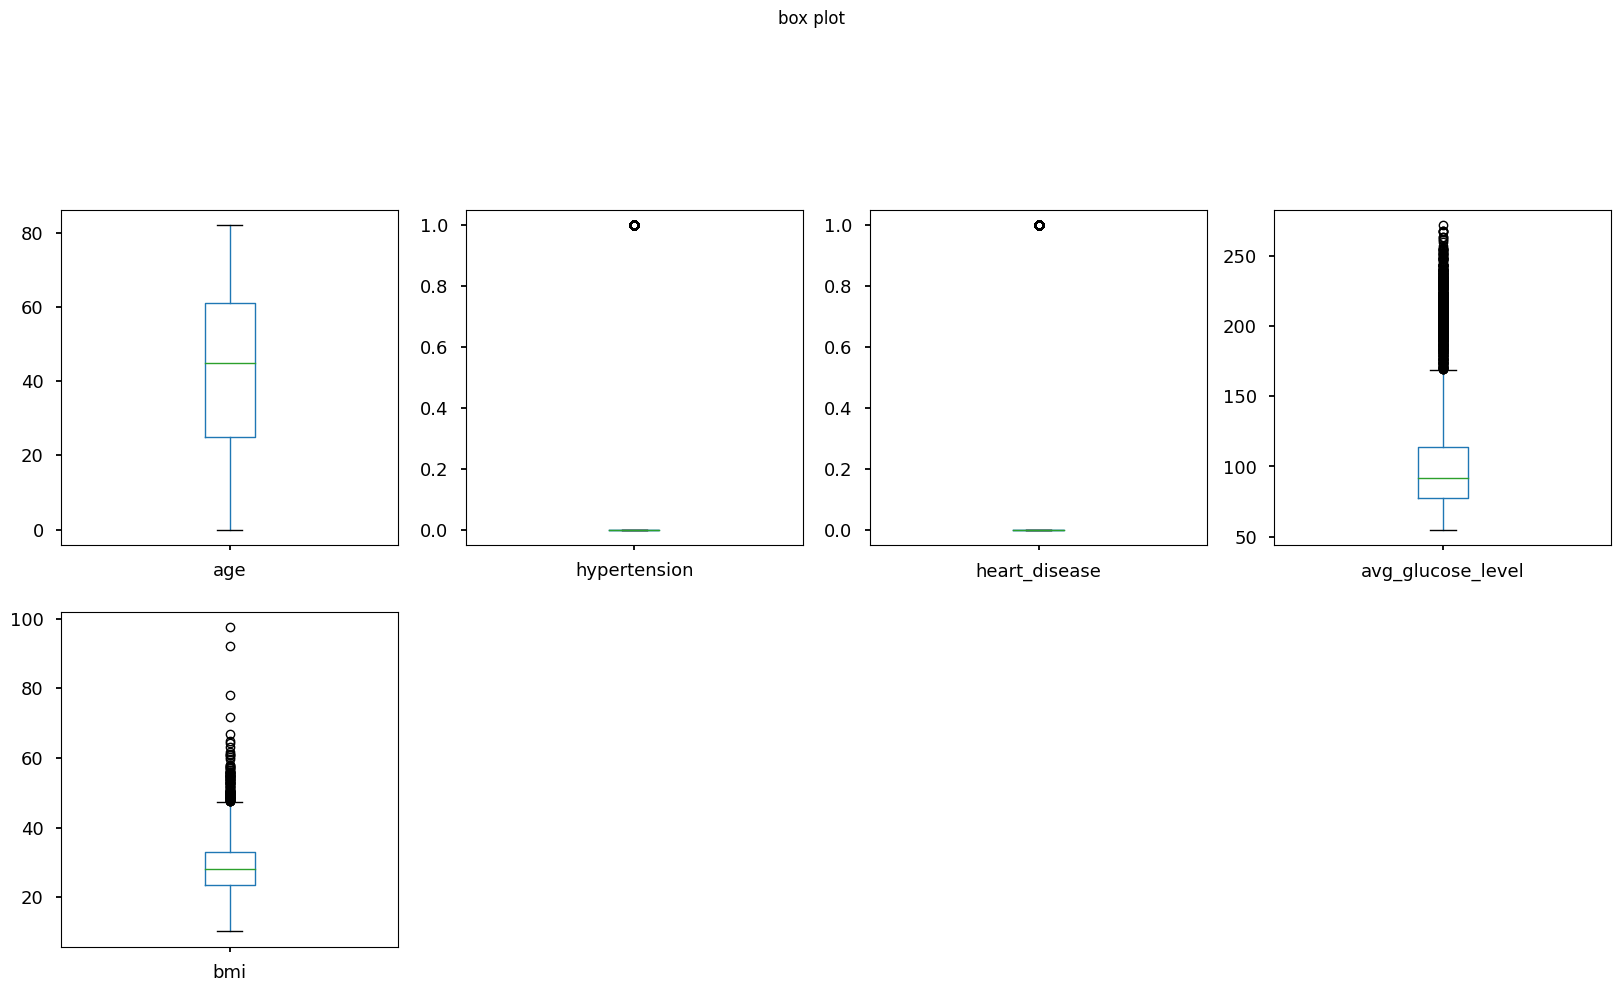

In [188]:
drop_cols = ['id', 'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']
outliers_strk_data.drop(drop_cols, axis=1).plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=[20,20], title='box plot')
plt.savefig('outliers_strk_data_boxplot')
plt.show()


<AxesSubplot:>

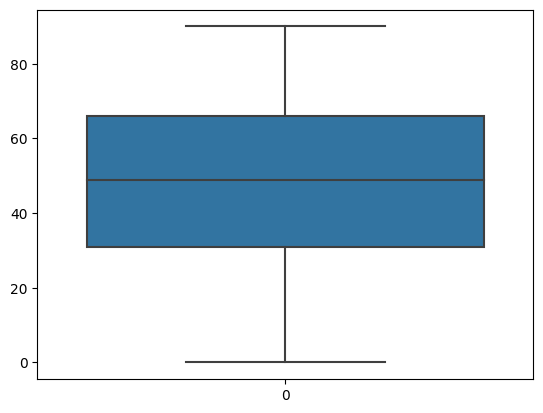

In [17]:
 
sns.boxplot(strk_data['age'])
 

 

<AxesSubplot:xlabel='age', ylabel='Count'>

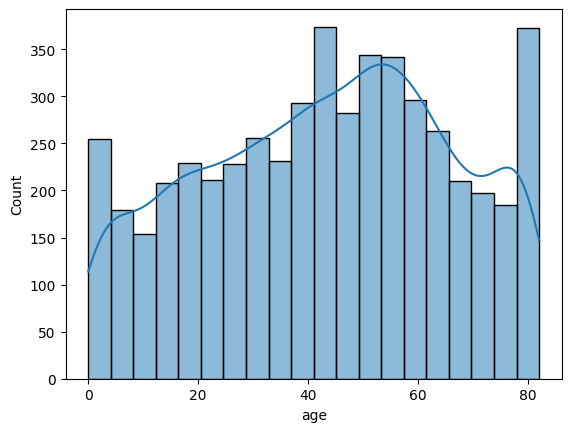

In [15]:
sns.histplot(strk_data['age'], kde=True)

In [201]:
outliers= []
non_out = []
def detect_outliers(data):
  threshold=3
  mean = np.mean(data)
  std = np.std(data)

  for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score) > threshold:
      outliers.append(i)

    if np.abs(z_score) < threshold:
      non_out.append(i)

  return outliers

In [202]:
detect_outliers(strk_data['age'])

[]

Working on lower fence and upper fence

In [203]:
IQR_dataset = sorted(outliers_strk_data['age'])
IQR_dataset

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,


In [204]:
q1,q3 = np.percentile(IQR_dataset,[25,75])

print(q1,q3)

25.0 61.0


In [205]:
iqr = q3-q1
print(iqr)

36.0


In [206]:
# Find the lower fence and higher fence
lower_fence = q1-1.5*iqr
higher_fence = q3+1.5*iqr
print(lower_fence, higher_fence)

-29.0 115.0


In [207]:
lower_outl=outliers_strk_data[outliers_strk_data['age']>20]
lower_outl

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [208]:
lower_outl.value_counts().sum()

3909

Oservation: I decided not to remove the ouliers in bmi and glucose level because outliers represent natural variations in the dataset 

In [34]:
# plt.style.use('_mpl-gallery')

# # make data:
# np.random.seed(10)
# D = np.random.normal((3, 5, 4), (1.25, 1.00, 1.25), (100, 3))

# # plot
# fig, ax = plt.subplots()
# VP = ax.boxplot(D, positions=[2, 4, 6], widths=1.5, patch_artist=True,
#                 showmeans=False, showfliers=False,
#                 medianprops={"color": "white", "linewidth": 0.5},
#                 boxprops={"facecolor": "C0", "edgecolor": "white",
#                           "linewidth": 0.5},
#                 whiskerprops={"color": "C0", "linewidth": 1.5},
#                 capprops={"color": "C0", "linewidth": 1.5})

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

# plt.show()

In [149]:
strk_data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

Checking for missing values

In [150]:
[features for features in strk_data.columns if strk_data[features].isnull().sum()>0]

['bmi']

Checking percentage of missing values

In [ ]:
print("percentage of missing values in bmi column:",round(strk_data['bmi'].isna().sum()/len(strk_data['bmi'])*100,2))

vissualizing missing values

<AxesSubplot:>

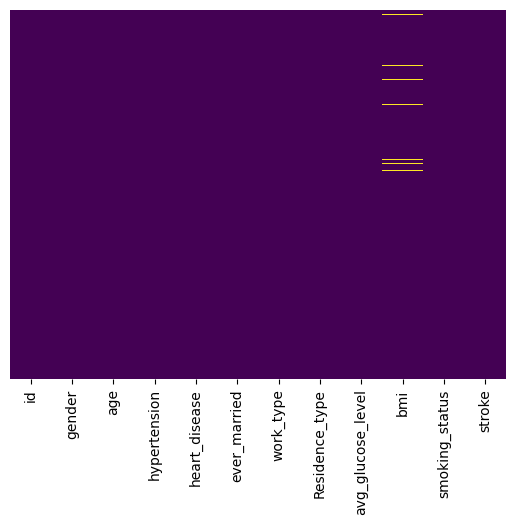

In [37]:
sns.heatmap(strk_data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [155]:
strk_data['stroke'].value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

Replacing the missing values in bmi by mode

In [152]:
strk_data['bmi']=strk_data['bmi'].fillna(strk_data['bmi'].mode()[0])

In [28]:
# strk_data['bmi']=strk_data['bmi'].fillna(method='ffill')

In [153]:
strk_data['bmi'].isnull().sum()

0

In [156]:
strk_data1 = strk_data.copy()
strk_data1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.70,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9717,87275,Male,72,0,0,No,Never_worked,Urban,100.26,23.53,formerly smoked,1
9718,71442,Female,82,0,1,No,Private,Rural,185.20,27.74,smokes,1
9719,2590,Female,62,0,0,Other,Govt_job,Urban,103.40,28.62,smokes,1
9720,15291,Male,59,0,0,Other,Govt_job,Rural,125.36,27.38,smokes,1


In [157]:
strk_data1['stroke'].value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

In [158]:
strk_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<AxesSubplot:>

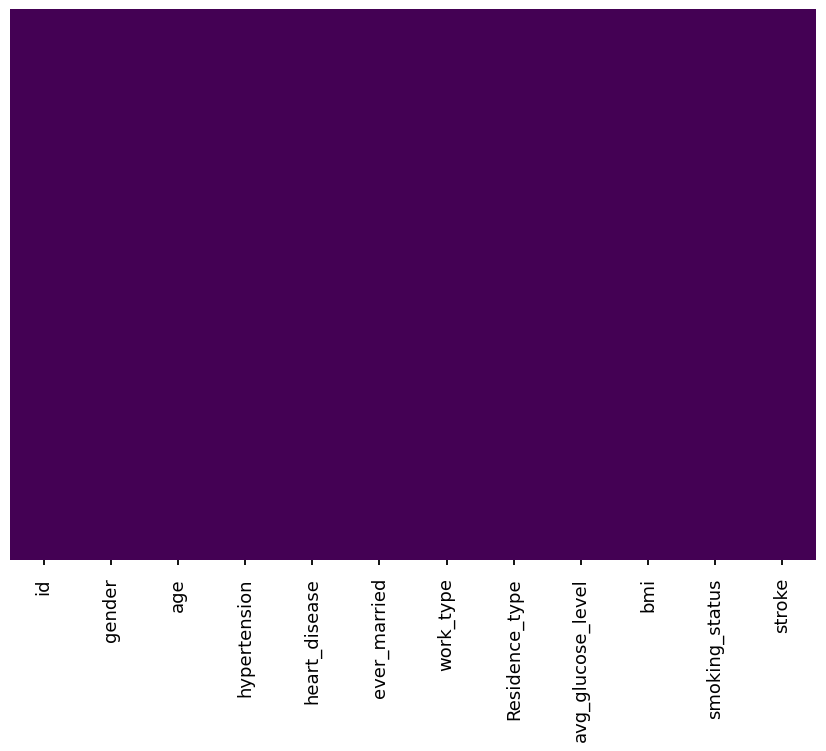

In [159]:
sns.heatmap(strk_data1.isnull(),yticklabels=False,cbar=False,cmap='viridis')

checking for unique values in each column

In [160]:
strk_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9722 entries, 0 to 9721
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9722 non-null   int64  
 1   gender             9722 non-null   object 
 2   age                9722 non-null   int32  
 3   hypertension       9722 non-null   int64  
 4   heart_disease      9722 non-null   int64  
 5   ever_married       9722 non-null   object 
 6   work_type          9722 non-null   object 
 7   Residence_type     9722 non-null   object 
 8   avg_glucose_level  9722 non-null   float64
 9   bmi                9722 non-null   float64
 10  smoking_status     9722 non-null   object 
 11  stroke             9722 non-null   int64  
dtypes: float64(2), int32(1), int64(4), object(5)
memory usage: 1.2+ MB


In [43]:
strk_data['age'].unique

<bound method Series.unique of 0       67
1       61
2       80
3       49
4       79
        ..
9717    72
9718    82
9719    62
9720    59
9721    82
Name: age, Length: 9722, dtype: int32>

In [34]:
strk_data['heart_disease'].unique()

array([1, 0], dtype=int64)

In [35]:
strk_data['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [36]:
strk_data['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [37]:
strk_data['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [38]:
strk_data['avg_glucose_level'].unique()

array([228.69, 202.21, 105.92, ...,  82.99, 166.29,  85.28])

In [39]:
strk_data['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [40]:
strk_data['stroke'].unique()

array([1, 0], dtype=int64)

In [113]:
strk_data1

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9717,87275,Male,72.0,0,0,No,Never_worked,Urban,100.26,23.53,formerly smoked,1
9718,71442,Female,82.0,0,1,No,Private,Rural,185.20,27.74,smokes,1
9719,2590,Female,62.0,0,0,Other,Govt_job,Urban,103.40,28.62,smokes,1
9720,15291,Male,59.0,0,0,Other,Govt_job,Rural,125.36,27.38,smokes,1


In [161]:
strk_data1['age'].value_counts()

78    167
50    161
51    161
62    156
53    155
     ... 
11     36
10     35
4      34
7      32
6      24
Name: age, Length: 91, dtype: int64

Univariate Analysis

In [162]:
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('seaborn-talk')
sns.countplot(strk_data1['smoking_status'], palette = 'PuBu'  )
plt.title('Comparison of different types of smoking_status', fontweight = 30, fontsize = 20)
plt.xlabel('types of smoking_status')
plt.ylabel('count')
plt.show()

ValueError: could not convert string to float: 'formerly smoked'

Bivariate Aalysis

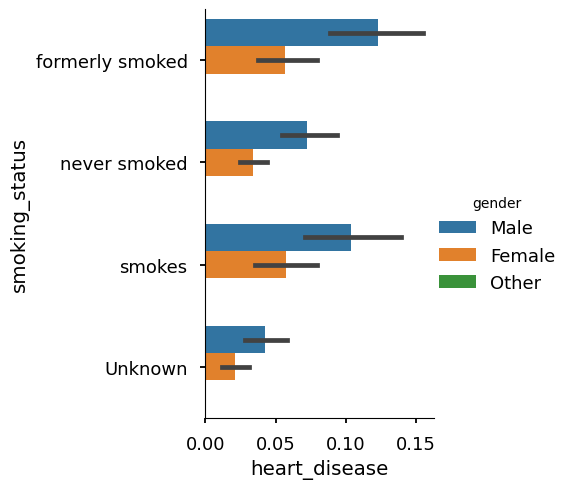

In [ ]:
sns.catplot(data=strk_data1, x="heart_disease", y="smoking_status", hue="gender", kind="bar")

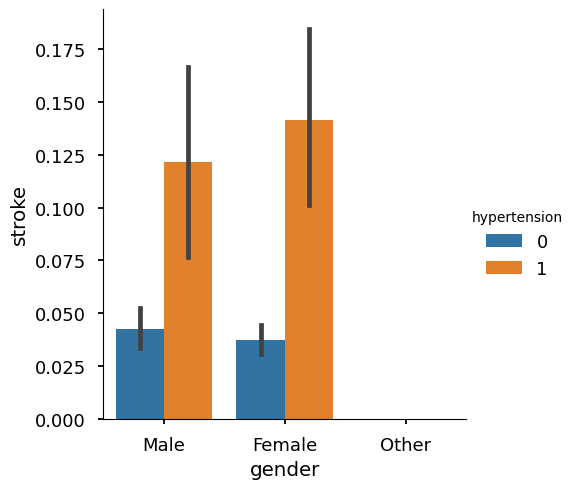

In [ ]:
sns.catplot(data=strk_data1, x="gender", y="stroke", hue="hypertension", kind="bar")

Observation: population of married men with hypertension are more than that of the married and unmarried men.

In [163]:
strk_data2 = strk_data1.copy()

In [164]:
strk_data2.drop(columns='id',inplace=True)

Multivariate Analysis

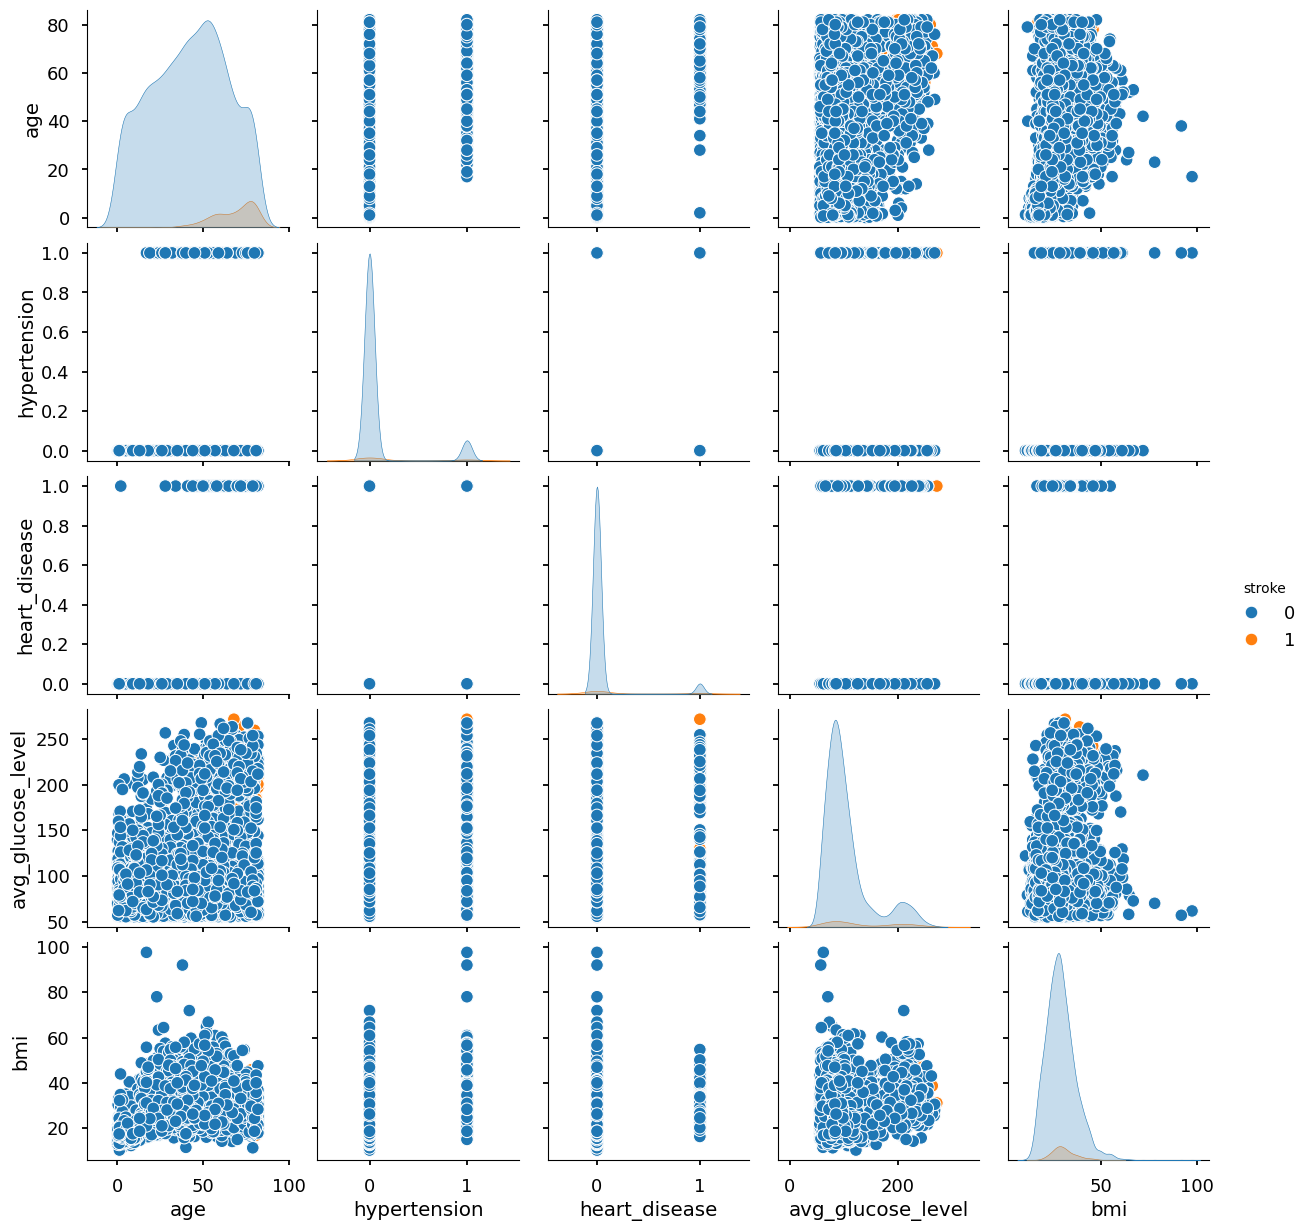

In [ ]:
sns.pairplot(strk_data2,hue = 'stroke')
plt.show()

In [165]:
strk_data2

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.70,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
9717,Male,72,0,0,No,Never_worked,Urban,100.26,23.53,formerly smoked,1
9718,Female,82,0,1,No,Private,Rural,185.20,27.74,smokes,1
9719,Female,62,0,0,Other,Govt_job,Urban,103.40,28.62,smokes,1
9720,Male,59,0,0,Other,Govt_job,Rural,125.36,27.38,smokes,1


In [166]:
strk_data3= strk_data2.copy()
strk_data3

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,28.70,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
9717,Male,72,0,0,No,Never_worked,Urban,100.26,23.53,formerly smoked,1
9718,Female,82,0,1,No,Private,Rural,185.20,27.74,smokes,1
9719,Female,62,0,0,Other,Govt_job,Urban,103.40,28.62,smokes,1
9720,Male,59,0,0,Other,Govt_job,Rural,125.36,27.38,smokes,1


Visualizing Imbalanced Dataset

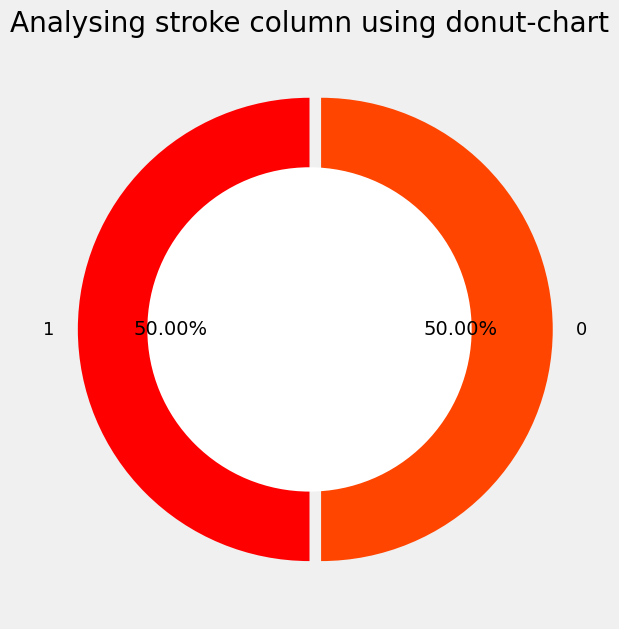

In [54]:
with plt.style.context(style="fivethirtyeight"):
    plt.pie(x=dict(strk_data3['stroke'].value_counts()).values(),
           labels=dict(strk_data3['stroke'].value_counts()).keys(),
           autopct="%.2f%%",
           colors=['red','orangered'],
           startangle=90,
           explode=[0,0.05])
    centre_circle=plt.Circle((0,0),0.70,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(label="Analysing stroke column using donut-chart")
    plt.show()

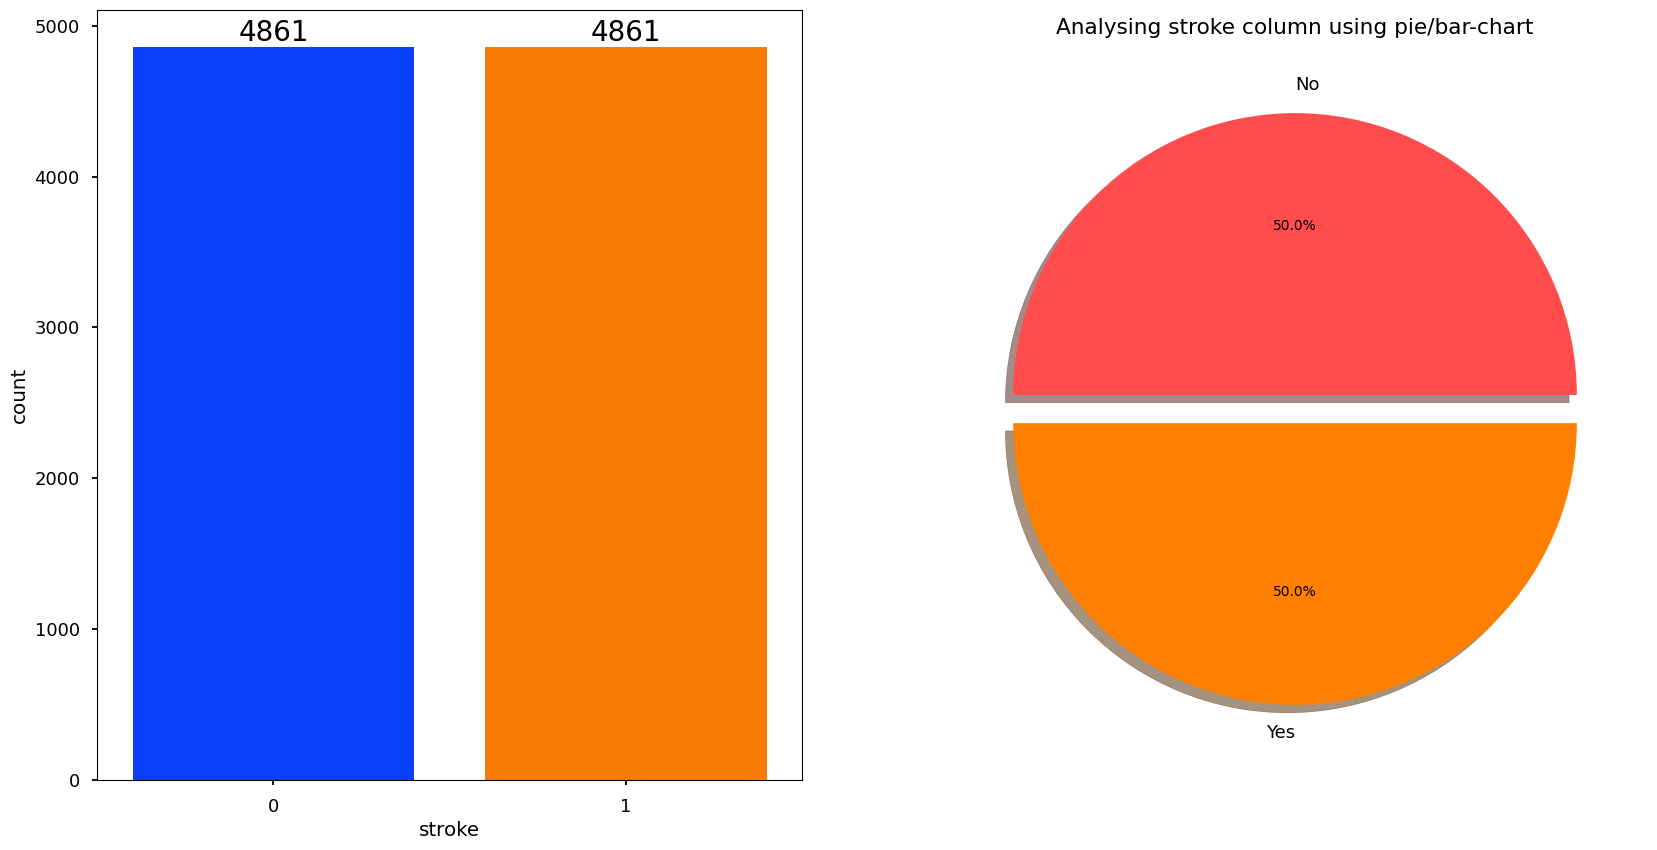

In [55]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=strk_data3['stroke'],data=strk_data3,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)

plt.pie(x=strk_data3['stroke'].value_counts(),labels=["No","Yes"],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.title(label="Analysing stroke column using pie/bar-chart")
plt.show()

In [167]:
strk_data3.shape

(9722, 11)

In [121]:
strk_data4 =strk_data3.copy()

In [122]:
strk_data4 

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
9717,Male,72.0,0,0,No,Never_worked,Urban,100.26,23.53,formerly smoked,1
9718,Female,82.0,0,1,No,Private,Rural,185.20,27.74,smokes,1
9719,Female,62.0,0,0,Other,Govt_job,Urban,103.40,28.62,smokes,1
9720,Male,59.0,0,0,Other,Govt_job,Rural,125.36,27.38,smokes,1


In [168]:
# df = pd.read_csv('dataset\stroke_data_new_extract.csv')

In [169]:
# strk_data5 = pd.concat([strk_data4,df], axis=0).reset_index(drop=True)

In [170]:
strk_data5

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Unnamed: 0,id
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,NaN,NaN
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.60,never smoked,1,NaN,NaN
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,NaN,NaN
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,NaN,NaN
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13712,Male,38.0,0,1,No,Self-employed,Rural,115.91,28.32,never smoked,0,4995.0,94781.0
13713,Female,69.0,0,0,Yes,Govt_job,Rural,93.43,27.01,formerly smoked,0,4996.0,78630.0
13714,Female,69.0,0,0,No,Govt_job,Urban,191.69,21.74,smokes,0,4997.0,33282.0
13715,Female,29.0,1,0,Other,Private,Urban,96.07,23.61,never smoked,0,4998.0,22187.0


In [171]:
strk_data4.to_csv('healthcare-dataset-stroke-data2.csv')

Seperating dependent variables(Target) from independent Variables

In [ ]:
y=strk_data3['stroke']
y

0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64

In [ ]:
X= strk_data3.drop(['stroke'], axis=1)
X

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,36.6,never smoked
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,18.6,never smoked
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked


In [ ]:
# count_X = X.value_counts()
# print('this are the values for  imbalanced data', count_X)

NameError: name 'X' is not defined

Solving imbalanced dataset

In [ ]:
# from imblearn.over_sampling import (RandomOverSampler)

In [ ]:
# resamp = RandomOverSampler()
# X, y = resamp.fit_resample(X, y )

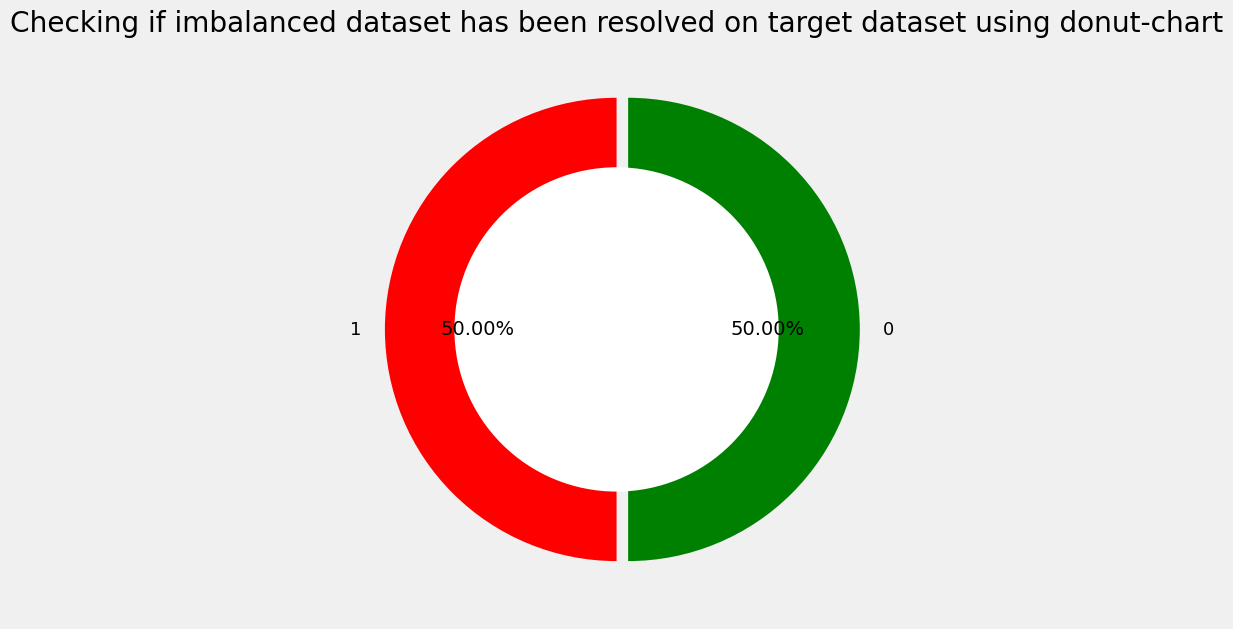

In [ ]:
with plt.style.context(style="fivethirtyeight"):
    plt.pie(x=dict(y.value_counts()).values(),
           labels=dict(y.value_counts()).keys(),
           autopct="%.2f%%",
           colors=['red','green'],
           startangle=90,
           explode=[0,0.05])
    centre_circle=plt.Circle((0,0),0.70,fc='white')
    fig=plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(label="Checking if imbalanced dataset has been resolved on target dataset using donut-chart")
    plt.show()